# 5.13 专题：核密度估计

密度评估器是一种利用D维数据集生成D维概率分布估计的算法。

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

## 5.13.1 KDE的由来：直方图

In [10]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

In [11]:
x = make_data(1000)

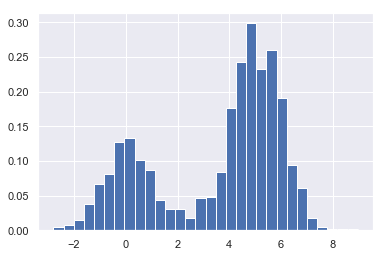

In [12]:
hist = plt.hist(x, bins=30, density=True)

In [13]:
density, bins, patches = hist

In [14]:
hist

(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <a list of 30 Patch objects>)

In [15]:
patches

<a list of 30 Patch objects>

In [16]:
widths = bins[1:] - bins[:-1]

In [17]:
(density * widths).sum()

1.0

In [18]:
x = make_data(20)

In [19]:
bins = np.linspace(-5, 10, 10)

d:\python35\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\python35\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


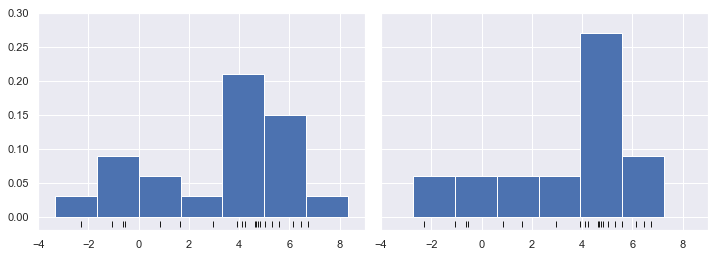

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim': (-4, 9), 'ylim': (-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

np.full_like：返回与给定数组具有相同形状和类型的数组。并且数组中元素的值是fill_value的值

(-0.2, 8)

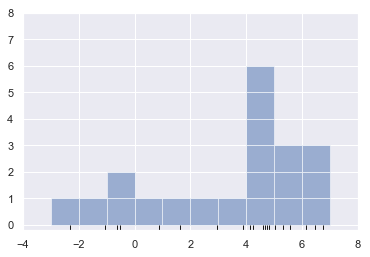

In [21]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))

ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

In [22]:
x_d = np.linspace(-4, 8, 2000)

In [23]:
density = sum((abs(xi - x_d) < 0.5) for xi in x)

In [24]:
density

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  6.74481176,  4.2387931 ,  5.3190391 ,  4.75062962,
        6.46210794,  2.93985929,  4.6775828 ,  4.61594565,  6.13376944,
        3.90010873,  4.82757179,  4.12214158,  5.04221375,  5.58281521])

In [26]:
x.shape

(20,)

In [27]:
x_d.shape

(2000,)

In [28]:
s = x[0] - x_d

In [29]:
s

array([ 5.62434536,  5.61834236,  5.61233936, ..., -6.36364863,
       -6.36965163, -6.37565464])

In [30]:
s<0.5

array([False, False, False, ...,  True,  True,  True])

tophat核

[-4, 8, -0.2, 8]

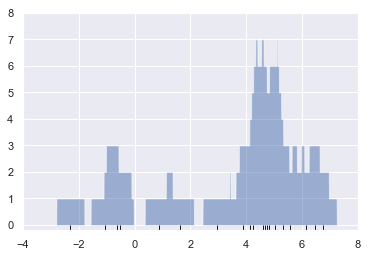

In [31]:
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

用标准的正态分布曲线代替每个点的方块

In [32]:
from scipy.stats import norm

In [33]:
x_d = np.linspace(-4, 8, 1000)

In [34]:
density = sum(norm(xi).pdf(x_d) for xi in x)

高斯核

[-4, 8, -0.2, 5]

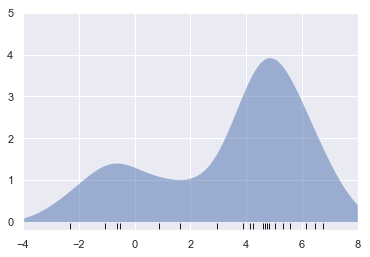

In [35]:
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5])

## 5.13.2 核密度估计的实际应用

In [36]:
from sklearn.neighbors import KernelDensity

d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
# 初始化并拟合KDE模型
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')

In [38]:
kde.fit(x[:, None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [39]:
# score_samples返回概率密度的对数值
logprob = kde.score_samples(x_d[:, None])

(-0.02, 0.22)

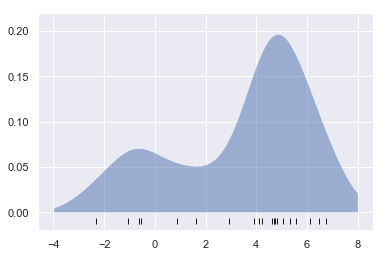

In [40]:
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

通过交叉检验选择带宽

在KDE中，带宽过窄将导致估计呈现高方差（过拟合），每个点的出现或缺失都会引起很大不同；带宽过宽将导致估计呈现高偏差（欠拟合），而且带宽较大的核还会破坏数据结构。

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.model_selection import LeaveOneOut

In [43]:
bandwidths = 10 ** np.linspace(-1, 1, 100)

In [44]:
bandwidths

array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.31992671,  0.33516027,  0.35111917,  0.36783798,  0.38535286,
        0.40370173,  0.42292429,  0.44306215,  0.46415888,  0.48626016,
        0.5094138 ,  0.53366992,  0.55908102,  0.58570208,  0.61359073,
        0.64280731,  0.67341507,  0.70548023,  0.7390722 ,  0.77426368,
        0.81113083,  0.84975344,  0.89021509,  0.93260335,  0.97700996,
        1.02353102,  1.07226722,  1.12332403,  1.17681195,  1.23284674,
        1.29154967,  1.35304777,  1.41747416,  1.48496826,  1.55567614,
        1.62975083,  1.70735265,  1.78864953,  1.87381742,  1.96304065,
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47

In [45]:
grid = GridSearchCV(
    KernelDensity(kernel='gaussian'), 
    {
        'bandwidth': bandwidths
    },
    cv=LeaveOneOut()
)

In [46]:
x.shape

(20,)

In [47]:
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

似然估计值最大化时的带宽：

In [48]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

## 5.13.3 示例：球形空间的KDE

In [49]:
from sklearn.datasets import fetch_species_distributions

In [50]:
data = fetch_species_distributions()

In [51]:
# 获取物种ID和位置矩阵/数组
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T

In [52]:
latlon

array([[-17.85   , -64.7    ],
       [-16.3333 , -67.8333 ],
       [-16.3    , -67.8833 ],
       ...,
       [ -0.3    , -78.4667 ],
       [  0.6    , -77.8167 ],
       [  4.96667, -75.3833 ]], dtype=float32)

In [53]:
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [54]:
species

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
data.train

array([(b'microryzomys_minutus', -64.7   , -17.85   ),
       (b'microryzomys_minutus', -67.8333, -16.3333 ),
       (b'microryzomys_minutus', -67.8833, -16.3    ), ...,
       (b'microryzomys_minutus_9', -78.4667,  -0.3    ),
       (b'microryzomys_minutus_9', -77.8167,   0.6    ),
       (b'microryzomys_minutus_9', -75.3833,   4.96667)],
      dtype=[('species', 'S22'), ('dd long', '<f4'), ('dd lat', '<f4')])

In [56]:
from mpl_toolkits.basemap import Basemap

In [57]:
from sklearn.datasets.species_distributions import construct_grids

In [58]:
xgrid, ygrid = construct_grids(data)

In [59]:
# 用Basemap画出海岸线
m = Basemap(projection='cyl', resolution='c', llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(), llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())

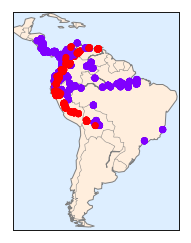

In [60]:
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# 画出位置
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3, c=species, cmap='rainbow', latlon=True)

In [61]:
# 准备画轮廓图的数据点
x, y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])

In [62]:
land_reference = data.coverages[6][::5, ::5]

In [63]:
land_mask = (land_reference > -9999).ravel()

In [64]:
land_mask.shape

(77517,)

In [65]:
xy = np.vstack([y.ravel(), x.ravel()]).T

In [66]:
xy = np.radians(xy[land_mask])

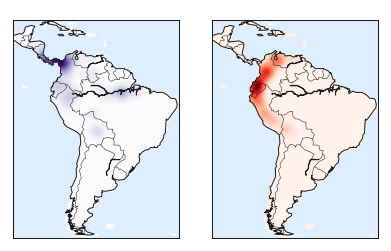

In [67]:
# 创建两幅并排的图
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i], color='white')
    
    # 用Basemap画出海岸线
    m = Basemap(projection='cyl', llcrnrlat=y.min(), urcrnrlat=y.max(), llcrnrlon=x.min(), urcrnrlon=x.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # 构建一个球形的分布核密度估计
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))
    
    # 只计算大陆的值：-9999表示是海洋
    z = np.full(land_mask.shape[0], -9999.0)
    z[land_mask] = np.exp(kde.score_samples(xy))
    z = z.reshape(x.shape)
    
    # 画出密度的轮廓
    levels = np.linspace(0, z.max(), 25)
    axi.contourf(x, y, z, levels=levels, cmap=cmaps[i])

## 5.13.4 示例：不是很朴素的贝叶斯

In [68]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [90]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """基于KDE的贝叶斯生成分类
    
    参数
    ----------
    bandwidth : float
        每个类中的核带宽
    kernel : str
        核函数的名称，传递给KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
    
    def fit(self, x, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [x[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(xi) for xi in training_sets]
        # 计算类的先验概率
        self.logpriors_ = [np.log(xi.shape[0] / x.shape[0]) for xi in training_sets]
        return self
    
    def predict_proba(self, x):
        logprobs = np.array([model.score_samples(x) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
    
    def predict(self, x):
        return self.classes_[np.argmax(self.predict_proba(x), 1)]

1. 解析自定义评估器

2. 使用自定义评估器

In [91]:
from sklearn.datasets import load_digits

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
digits = load_digits()

In [94]:
bandwidths = 10 ** np.linspace(0, 2, 100)

In [95]:
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})

In [96]:
grid.fit(digits.data, digits.target)

d:\python35\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KDEClassifier(bandwidth=1.0, kernel='gaussian'),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074...
        34.30469286,  35.93813664,  37.64935807,  39.44206059,
        41.320124  ,  43.28761281,  45.34878508,  47.50810162,
        49.77023564,  52.14008288,  54.62277218,  57.22367659,
        59.94842503,  62.80291442,  65.79332247,  68.92612104,
        72.20809018,  75.64633276,  79.24828984,  83.02175681,
        86.97490026,  91.11627561,  95.45484567, 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [118]:
scores = grid.cv_results_['mean_test_score']
scores

array([0.49360045, 0.40845854, 0.53533667, 0.43238731, 0.4785754 ,
       0.38786867, 0.45019477, 0.4852532 , 0.43572621, 0.44852532,
       0.5180857 , 0.48914858, 0.52476349, 0.52198108, 0.62493044,
       0.65998887, 0.65998887, 0.70116861, 0.71786311, 0.80634391,
       0.81524763, 0.84974958, 0.88759043, 0.90539789, 0.92153589,
       0.93600445, 0.95102949, 0.95548136, 0.95993322, 0.96215915,
       0.96327212, 0.96327212, 0.96438509, 0.96494157, 0.96438509,
       0.96438509, 0.96438509, 0.9638286 , 0.9638286 , 0.96494157,
       0.96549805, 0.96494157, 0.96661102, 0.96661102, 0.96605454,
       0.96605454, 0.96605454, 0.96605454, 0.96327212, 0.96048971,
       0.95548136, 0.95492487, 0.95269894, 0.95269894, 0.95047301,
       0.9476906 , 0.94268225, 0.93934335, 0.93600445, 0.9309961 ,
       0.92821369, 0.92264886, 0.91930996, 0.91652755, 0.91318865,
       0.90873678, 0.90595437, 0.90094602, 0.89315526, 0.88870339,
       0.88759043, 0.8853645 , 0.88425153, 0.88313856, 0.88035

画出交叉验证值曲线，用交叉验证值作为带宽函数。

{'bandwidth': 7.054802310718643}
accuracy =  0.9666110183639399


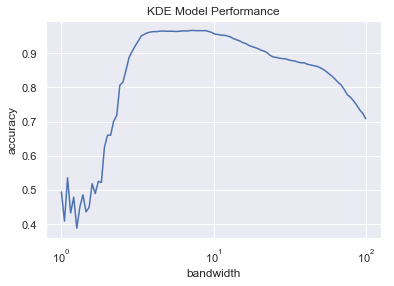

In [117]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy = ', grid.best_score_)

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

d:\python35\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8186003803550138